# Code session 1 

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

# Determinação de raízes

`bisect`

A função `bisect` localiza a raiz de uma função dentro de um intervalo dado usando o método da bisseção. 
Os argumentos de entrada obrigatórios desta função são: 

1. a função-alvo `f` (contínua)
2. o limite esquerdo `a`
3. o limite direito `b`

Parâmetros opcionais relevantes são: 

- `xtol`: tolerância (padrão: 2e-12)
- `maxiter`: número máximo de iterações (padrão: 100)
- `disp`: mostra erro se algoritmo não convergir (padrão: True) 

O argumento de saída é:

- `x0`: a estimativa para a raiz de `f`

Como importá-la? 

```python 
from scipy.optimize import bisect
```

In [2]:
from scipy.optimize import bisect

## Problema 1:

Encontre a menor raiz positiva (real) de $x^{3} - 3.23x^{2} - 5.54x + 9.84 = 0$ pelo método da bisseção.

### Resolução:

In [3]:
# função
def f(x): 
    return x**3 - 3.23*x**2 - 5.54*x + 9.84

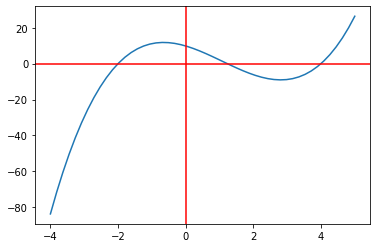

In [4]:
# analise gráfica 
x = np.linspace(-4,5)
plt.plot(x,f(x));
plt.axhline(y=0,color='r');
plt.axvline(x=0,color='r');

Pelo gráfico, vemos que a menor raiz positiva está localizada no intervalo $(0,2]$. Vamos determiná-la utilizando este intervalo de confinamento. 

In [5]:
# resolução com bisect 

x = bisect(f,0,2) # raiz 

print('Raiz: x = %f' % x)

Raiz: x = 1.230000


## Problema 2: 

Determine a menor raiz não nula positiva de $\cosh(x) \cos(x) - 1 = 0$ dentro do intervalo $(4,5)$.

### Resolução

Sigamos o procedimento aprendido com `bisect`. 

In [6]:
# função
def f(x): 
    return np.cosh(x)*np.cos(x) - 1 

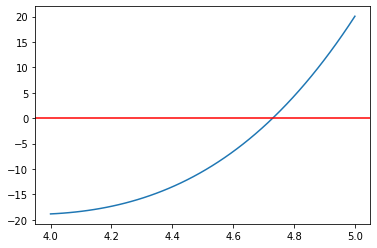

In [7]:
# analise gráfica 
x = np.linspace(4,5)
plt.plot(x,f(x));
plt.axhline(y=0,color='r');

In [8]:
# resolução com bisect 

x = bisect(f,4,5) # raiz 

print('Raiz: x = %f' % x)

Raiz: x = 4.730041


## Problema 3

Uma raiz da equação $\tan(x) - \tanh(x) = 0$ encontra-se em $(7.0,7.4)$. Determine esta raiz com três casas decimais de precisão pelo método da bisseção.

### Resolução

In [9]:
# função
def f(x): 
    return np.tan(x) - np.tanh(x)

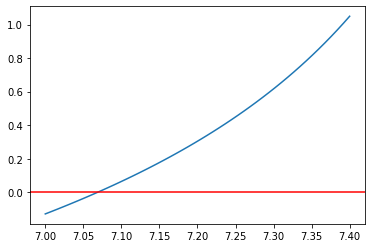

In [10]:
# analise gráfica 
x = np.linspace(7,7.4)
plt.plot(x,f(x));
plt.axhline(y=0,color='r');

Para obter as 3 casas decimas, vamos imprimir o valor final com 3 casas decimais. 

In [11]:
x = bisect(f,7,7.4) # raiz 

print('Raiz: x = %.3f' % x)

Raiz: x = 7.069


## Problema 4: 

Determine as raízes de $\text{sen}(x) + 3\cos(x) - 1 = 0$ no intervalo $(-2,2)$.

### Resolução

In [12]:
# função
def f(x): 
    return np.sin(x) + np.cos(x) - 1

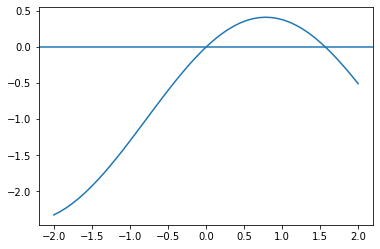

In [13]:
# analise gráfica 
x = np.linspace(-2,2)
plt.plot(x,f(x));
plt.axhline(y=0);

A análise gráfica mostra duas raízes. Vamos encontrar uma de cada vez.

In [14]:
# resolução com bisect 

x1 = bisect(f,-2,1) # raiz 1  
x2 = bisect(f,1,2) # raiz 2 

print('Raízes: x1 = %f; x2 = %f' % (x1,x2))

Raízes: x1 = -0.000000; x2 = 1.570796


## Problema 5:

Determine todas as raízes reais de $P(x) = x^4 + 0.9x^3 - 2.3x^2 + 3.6x - 25.2$

### Resolução

In [15]:
# função 
def P(x):
    return x**4 + 0.9*x**3 - 2.3*x**2 + 3.6*x - 25.2

In [16]:
# define função para analise gráfica 
def analise_grafica(xrange,f):
    plt.plot(xrange,f(xrange));
    plt.axhline(y=0);

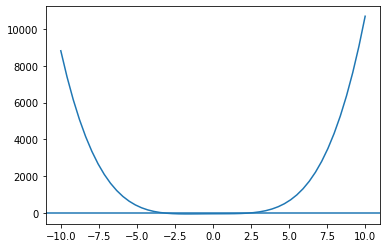

In [17]:
# analise gráfica 1
xrange = np.linspace(-10,10)
analise_grafica(xrange,P)

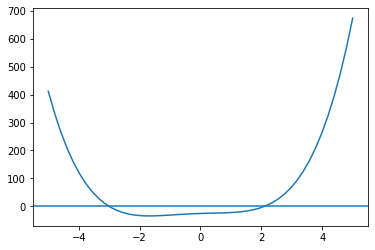

In [18]:
# refinamento
xrange = np.linspace(-5,5)
analise_grafica(xrange,P)

In [19]:
# resolução com bisect 

x1 = bisect(P,-4,-2) # raiz 1  
x2 = bisect(P,1,3) # raiz 2 

print('Raízes: x1 = %f; x2 = %f' % (x1,x2))

Raízes: x1 = -3.000000; x2 = 2.100000


## Problema 6: 

Um jogador de futebol americano está prestes a fazer um lançamento para outro jogador de seu time. O lançador tem uma altura de 1,82 m e o outro jogador está afastado de 18,2 m. A expressão que descreve o movimento da bola é a familiar equação da física que descreve o movimento de um projétil:

$$y = x\tan(\theta) - \dfrac{1}{2}\dfrac{x^2 g}{v_0^2}\dfrac{1}{\cos^2(\theta)} + h,$$

onde $x$ e $y$ são as distâncias horizontal e verical, respectivamente, $g=9,8 \, m/s^2$ é a aceleração da gravidade, $v_0$ é a velocidade inicial da bola quando deixa a mão do lançador e $\theta$ é o Ângulo que a bola faz com o eixo horizontal nesse mesmo instante. Para $v_0 = 15,2 \, m/s$, $x = 18,2 \, m$, $h = 1,82 \, m$ e $y = 2,1 \, m$, determine o ângulo $\theta$ no qual o jogador deve lançar a bola. 

### Resolução

In [20]:
# parâmetros do problema
v0 = 15.2
x = 18.2
h = 1.82
y = 2.1
g = 9.8

# função f(theta) = 0
f = lambda theta: x*np.tan(theta) - 0.5*(x**2*g/v0**2)*(1/(np.cos(theta)**2)) + h - y

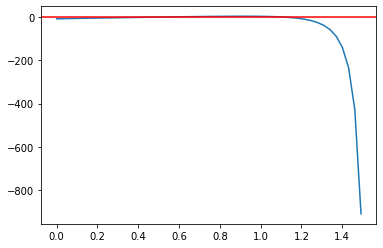

In [21]:
# análise gráfica
th = np.linspace(0,0.95*np.pi/2,50)
plt.plot(th,f(th));
plt.axhline(y=0,color='r');

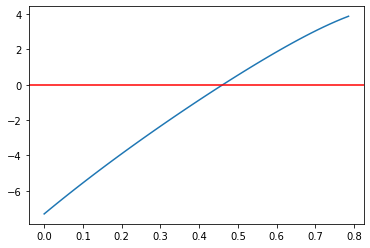

In [22]:
# análise gráfica - 2
th = np.linspace(0,np.pi/4,50)
plt.plot(th,f(th));
plt.axhline(y=0,color='r');

In [23]:
# resolução por bisseção
xr = bisect(f,0.1,0.6)
print('Ângulo de lançamento: %.2f graus' % np.rad2deg(xr))

Ângulo de lançamento: 26.41 graus


## Problema 7:

A equação de Bernoulli para o escoamento de um fluido em um canal aberto com um pequeno ressalto é 

$$\dfrac{Q^2}{2gb^2h_0^2} + h_0 = \dfrac{Q^2}{2gb^2h^2} + h + H,$$

onde $Q = 1.2 \, m^3/s$ é a vazão volumétrica, $g = 9.81 \, m/s^2$ é a aceleração gravitacional, $b = 1.8 \, m$ a largura do canal, $h_0 = 0.6 \, m$ o nível da água à montante, $H = 0.075 \, m$ a altura do ressalto e $h$ o nível da água acima do ressalto. Determine $h$.

### Resolução

Para este problema, definiremos duas funções, uma auxiliar, que chamaremos `a`, e a função `f(h)` que reescreve a equação de Bernoulli acima em função de $h$. 

In [24]:
# função para cálculo de parâmetros
def a(Q,g,b,H,h0):
    return Q,g,b,H,h0

# função do nível de água
def f(h):
    frate,grav,width,bHeight,ups = a(Q,g,b,H,h0)
    c = lambda arg: frate**2/(2*grav*width**2*arg**2)
    return c(h) - c(h0) + h - h0 + H 

Note que a função `a` é apenas uma conveniência para o cálculo do termo comum envolvendo a vazão e para construírmos uma generalização para os dados de entrada. Em seguida, definiremos os parâmetros de entrada do problema. 

In [25]:
# parâmetros de entrada
Q = 1.2 # m3/s 
g = 9.81 # m/s2
b = 1.8 # m
h0 = 0.6 # m
H = 0.075 # m

A partir daí, podemos realizar a análise gráfica para verificar o comportamento de `f(h)`.

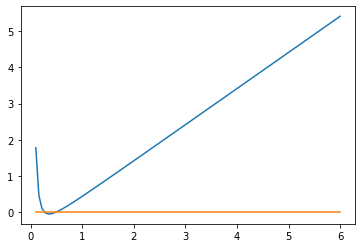

In [26]:
# análise gráfica
h = np.linspace(0.1,6,num=100)
plt.plot(h,f(h),h,f(h)*0);

Ampliemos a localização.

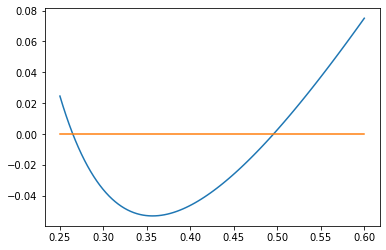

In [27]:
# análise gráfica
h = np.linspace(0.25,0.6,num=100)
plt.plot(h,f(h),h,f(h)*0);

Verificamos que `f(h)` admite duas soluções. Vamos determinar cada uma delas. 

In [28]:
# solução  
h1 = bisect(f,0.25,0.32)
print('Raiz: h1 = %f' % h1)

h2 = bisect(f,0.4,0.55)
print('Raiz: h2 = %f' % h2)

Raiz: h1 = 0.264755
Raiz: h2 = 0.495755


**Nota:** as duas soluções viáveis dizem respeito ao regime de escoamento no canal aberto. Enquanto $h_1$ é um limite para escoamento supercrítico (rápido), $h_2$ é um limite para escoamento subcrítico (lento).

## Problema 8:

A velocidade $v$ de um foguete Saturn V em voo vertical próximo à superfície da Terra pode ser aproximada por

$$v = u\textrm{ln}\left(\dfrac{M_0}{M_0 - \dot{m}t} \right) - gt,$$

onde $u = 2510 \, m/s$ é a velocidade de escape relativa ao foguete, $M_0 = 2.8 \times 10^6 \, kg$ é a massa do foguete no momento do lançamento, $\dot{m} = 13.3 \times 10^3 \, kg/s$ é a taxa de consumo de combustível, $g = 9.81 \, m/s^2$ a aceleração gravitacional e $t$ o tempo medido a partir do lançamento. 

Determine o instante de tempo $t^*$ quando o foguete atinge a velocidade do som ($335 \, m/s$).

### Resolução

Seguiremos a mesma ideia utilizada no Problema 7. Primeiramente, construímos uma função auxiliar para calcular parâmetros e, em seguida, definimos uma função `f(t)`.  

In [29]:
# função para cálculo de parâmetros
def a(u,M0,m,g,v):
    return u,M0,m,g,v

# função do tempo
def f(t):
    escape,mass,fuel,grav,vel = a(u,M0,m,g,v)    
    return escape*np.log(mass/(mass - fuel*t)) - g*t - vel

Definimos os parâmetros do problema.

In [30]:
# parâmetros de entrada
u = 2510.0 # m/s 
M0 = 2.8e6 # kg
m = 13.3e3 # kg/s
g = 9.81 # m/s2
v = 335.0 # m/s

Utilizaremos a análise gráfica para determinar o intervalo de refinamento da raiz. 

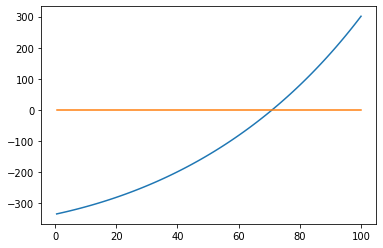

In [31]:
# análise gráfica
t = np.linspace(0.5,100,num=100)
plt.plot(t,f(t),t,f(t)*0);

Podemos verificar que a raiz está entre 60 e 80 segundos. Utilizaremos estes limitantes. 

In [32]:
# solução  
tr = bisect(f,60,80)
print('Raiz: tr = %.2f s = %.2f min' % (tr,tr/60) )

Raiz: tr = 70.88 s = 1.18 min


O foguete rompe a barreira do som em 1 minuto e 18 segundos!